In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from matplotlib.font_manager import FontProperties
import numpy as np

In [5]:
# read in file
file_path = '261102387_按序号_医学数据挖掘实用技术课程Chatbot使用反馈调查_32_32.xlsx'
df = pd.read_excel(file_path)

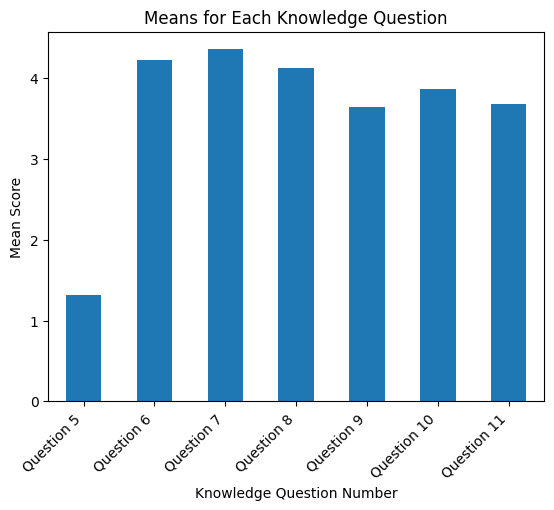

In [6]:
# knowledge questions q5-q11
columns_knowledge_llm = df.iloc[:, 10:17]
knowledge_means = columns_knowledge_llm.mean()

knowledge_means.plot(kind='bar')
column_new_names = [f'Question {i}' for i in range(5, 12)]
plt.xlabel('Knowledge Question Number')
plt.ylabel('Mean Score')
plt.title('Means for Each Knowledge Question')
plt.xticks(range(len(knowledge_means)), column_new_names)
plt.xticks(rotation=45, ha='right')
plt.show()

knowledge_score_sum = columns_knowledge_llm.sum(axis=1)
knowledge_score_mean = knowledge_score_sum.mean()
# print(columns_knowledge_llm)
# print(knowledge_score_sum)
# print(knowledge_score_mean)

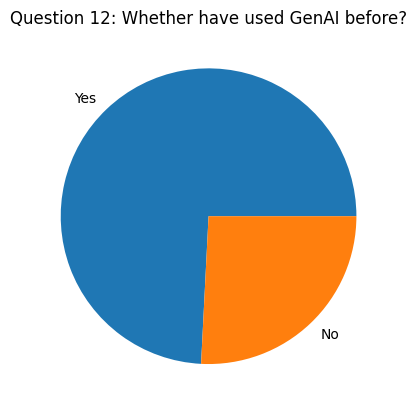

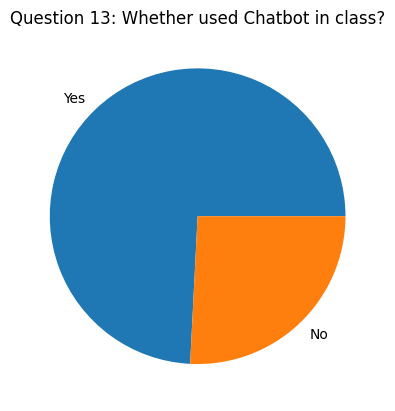

Chi-squared statistic: 0.0
P-value: 1.0
Fail to reject the null hypothesis: No significant association between the variables.


In [7]:
# The relationship between q12 and q13
whether_used_genai = df.iloc[:, 17]
plt.title('Question 12: Whether have used GenAI before?')
plt.pie(whether_used_genai.value_counts(), labels=['Yes', 'No'])
plt.show()

whether_used_chat2r = df.iloc[:, 18]
plt.title('Question 13: Whether used Chatbot in class?')
plt.pie(whether_used_chat2r.value_counts(), labels=['Yes', 'No'])
plt.show()

contingency_table = pd.crosstab(whether_used_genai, whether_used_chat2r)
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between the variables.")
else:
    print("Fail to reject the null hypothesis: No significant association between the variables.")

1     3.0
3     3.0
5     2.0
6     2.0
7     3.0
9     2.0
10    3.0
11    3.0
12    2.0
13    2.0
14    2.0
15    2.0
17    3.0
18    2.0
19    2.0
20    2.0
22    3.0
23    3.0
24    2.0
25    3.0
27    2.0
29    3.0
30    2.0
Name: 14、您使用Chatbot的频率是:（每天/每周/每月/偶尔）, dtype: float64


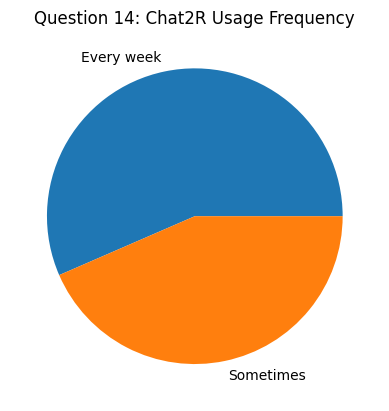

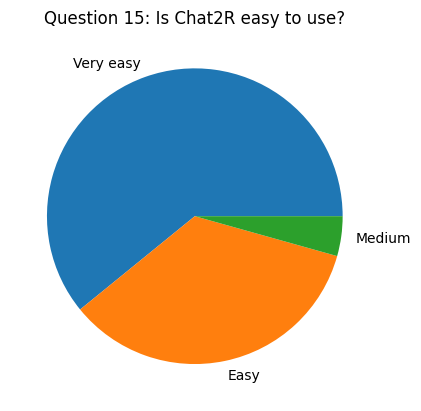

In [8]:
#q14-15
chat2r_use_f = df.iloc[:, 19].dropna()
print(chat2r_use_f)
plt.title('Question 14: Chat2R Usage Frequency')
plt.pie(chat2r_use_f.value_counts(), labels=['Every week', 'Sometimes'])
plt.show()

whether_easy_to_use = df.iloc[:, 20].dropna()

plt.title('Question 15: Is Chat2R easy to use?')
plt.pie(whether_easy_to_use.value_counts(), labels=['Very easy', 'Easy', 'Medium'])
plt.show()

18、我愿意将Chatbot作为课程的常规学习工具。
5    15
4    12
3     3
2     1
Name: count, dtype: int64


NameError: name 'sizes' is not defined

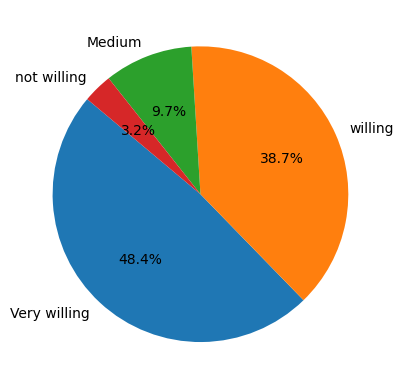

In [9]:
# q16-18
# eliminate rows where participants did not use chat2r
willingness_preselect = df[df.iloc[:, 18] != 2]
willingness_16_to_18 = willingness_preselect.iloc[:, [21, 22, 23]]
# print(willingness_16_to_18)


#q18
willingness_chat2r = df.iloc[:, 23]

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(willingness_chat2r.value_counts(), labels=['Very willing', 'willing', 'Medium', 'not willing'],
                                  autopct='%1.1f%%', startangle=140)
print(willingness_chat2r.value_counts())
# Add count numbers to the pie chart
for i, autotext in enumerate(autotexts):
    autotext.set_text(f'{sizes[i]} ({autotext.get_text()})')

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')
plt.pie(willingness_chat2r.value_counts(), labels=['Very willing', 'willing', 'Medium', 'not willing'])
plt.show()

Question 19 - Mean=4.161290322580645, SD=0.7347005827114602
Question 20 - Mean=3.6451612903225805, SD=0.6607262215055085
Question 21 - Mean=4.645161290322581, SD=0.4863734571139201
Question 22 - Mean=4.32258064516129, SD=0.6525384675349823
Question 23 - Mean=4.225806451612903, SD=0.5603378397214093
Question 24 - Mean=4.354838709677419, SD=0.7549122287513162


/var/folders/nb/11484m_n3g5bxgj9mq876wmc0000gn/T/ipykernel_20947/897228124.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([name for name in column_new_names], rotation=45, ha='right')  # Set the new labels


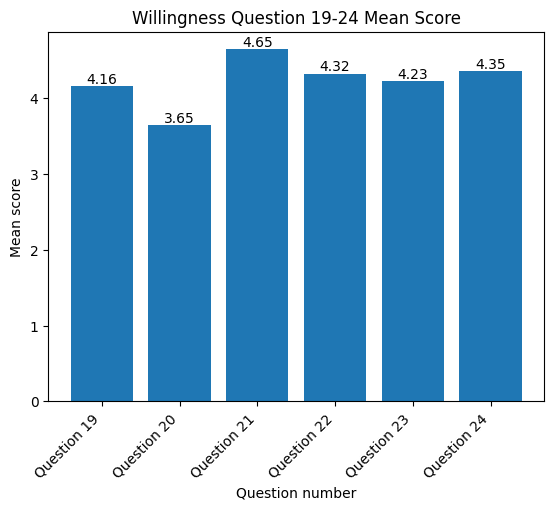

In [11]:
# GenAI willingness q19-24
for i in range(19, 25, 1):
    q = df.iloc[:, i + 5]
    print(f'Question {i} - Mean={q.mean()}, SD={q.std()}')

# plot all of them
genai_willingness = df.iloc[:, 24:30]
# print(genai_willingness)

willingness_mean = genai_willingness.mean()
# print(type(willingness_mean))
# print(willingness_mean)


# Create a bar plot
fig, ax = plt.subplots()
column_new_names = [f'Question {i}' for i in range(19, 25)]
values = willingness_mean.values
bars = ax.bar(willingness_mean.index, values)


# Add values on top of each bar
for bar, value in zip(bars, values):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{value:.2f}', ha='center', va='bottom')

# Set new label names for categories
# ax.set_xticks(willingness_mean.index)  # Set the tick positions to the original category labels
ax.set_xticklabels([name for name in column_new_names], rotation=45, ha='right')  # Set the new labels

# Set title and labels
ax.set_title('Willingness Question 19-24 Mean Score')
ax.set_xlabel('Question number')
ax.set_ylabel('Mean score')

# Show plot
plt.show()

# willingness_mean.plot(kind='bar')
# column_new_names = [f'Question {i}' for i in range(19, 25)]
# plt.xlabel('Willingness Question Number')
# plt.ylabel('Mean Score')
# plt.title('Means for Each Willingness Question')
# plt.xticks(range(len(willingness_mean)), column_new_names)
# plt.xticks(rotation=45, ha='right')
# plt.show()


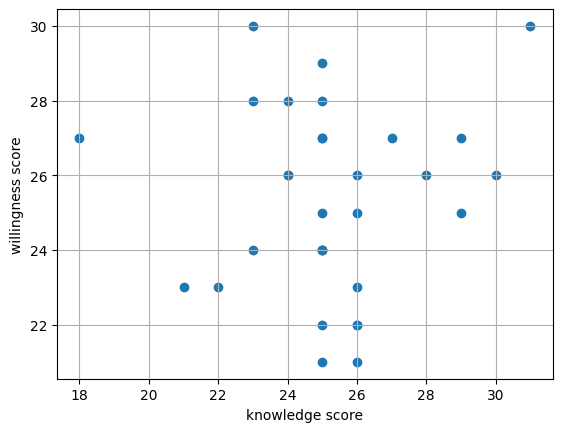

Pearson correlation coefficient: 0.0902012222061976
P-value: 0.6294035237787878


In [12]:
# columns_knowledge_llm q5-11 vs genai_willingness q19-24
knowledge_score_sum = columns_knowledge_llm.sum(axis=1)
knowledge_score_mean = knowledge_score_sum.mean()
willingness_score_sum = genai_willingness.sum(axis=1)
willingness_score_mean = willingness_score_sum.mean()

plt.scatter(knowledge_score_sum, willingness_score_sum)
plt.xlabel('knowledge score')
plt.ylabel('willingness score')
plt.grid(True)
plt.show()

# Calculate Pearson correlation coefficient and p-value
corr, p_value = pearsonr(knowledge_score_sum, willingness_score_sum)

print("Pearson correlation coefficient:", corr)
print("P-value:", p_value)

/var/folders/nb/11484m_n3g5bxgj9mq876wmc0000gn/T/ipykernel_20947/231593461.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(f'{value_counts.index[i]} ({value_counts[i]})',


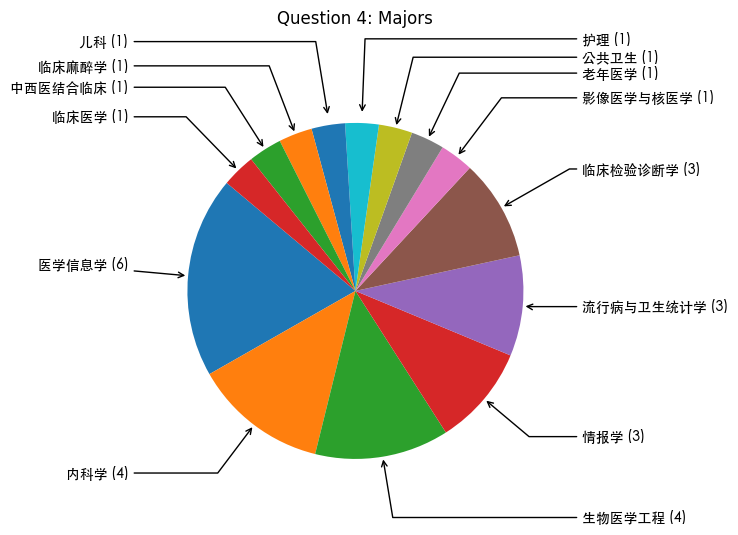

In [13]:
# q4 - majors
majors = df.iloc[:, 9]

font_path = '/System/Library/Fonts/STHeiti Medium.ttc'  # Change this to the correct path on your system
font_prop = FontProperties(fname=font_path)


value_counts = majors.value_counts()

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(value_counts, autopct='', startangle=140, textprops={'fontproperties': font_prop})

# Customize labels and percentages
for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    y = np.sin(np.deg2rad(angle))
    x = np.cos(np.deg2rad(angle))

    if y > 0.98:
        y += 0.05
    
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(angle)
    
    ax.annotate(f'{value_counts.index[i]} ({value_counts[i]})',
                xy=(x, y), xytext=(1.35 * np.sign(x), 1.4 * y),
                horizontalalignment=horizontalalignment,
                fontsize=10, fontproperties=font_prop,
                arrowprops=dict(arrowstyle="->", connectionstyle=connectionstyle))
# plt.pie(majors.value_counts(), labels=majors.value_counts().index, autopct='%1.1f%%', startangle=140, textprops={'fontproperties': font_prop})
ax.axis('equal')
plt.title('Question 4: Majors', y=1.2)
plt.show()

In [14]:
# majors and knowledge_score_sum
distinct_majors = majors.unique()
print(distinct_majors)

['内科学' '生物医学工程' '医学信息学' '影像医学与核医学' '情报学' '老年医学' '公共卫生' '护理' '儿科'
 '流行病与卫生统计学' '临床麻醉学' '中西医结合临床' '临床检验诊断学' '临床医学']
